In [6]:
import pandas as pd
import requests

# データの取得

In [4]:
URL = "https://finance.yahoo.com/quote/AAPL/history?p=AAPL"

In [8]:
data = pd.read_html(requests.get(URL,headers={"User-agent" : "Mozilla/5.0"}).text,header = 0)

In [10]:
data[0].head() #今回表は一つだけなので０

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Mar 04, 2022",164.49,165.55,162.11,163.17,163.17,83819592
1,"Mar 03, 2022",168.47,168.91,165.55,166.23,166.23,76335600
2,"Mar 02, 2022",164.39,167.36,162.95,166.56,166.56,79724800
3,"Mar 01, 2022",164.70,166.60,161.97,163.20,163.20,83474400
4,"Feb 28, 2022",163.06,165.42,162.43,165.12,165.12,94869100


In [11]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Oct 19, 2021",147.01,149.17,146.55,148.76,148.35,76378900
97,"Oct 18, 2021",143.45,146.84,143.16,146.55,146.15,85589200
98,"Oct 15, 2021",143.77,144.90,143.51,144.84,144.44,67885200
99,"Oct 14, 2021",142.11,143.88,141.51,143.76,143.37,69907100
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


# 前処理

### 取得データの問題点
*["Adj Close**"]文字列が入り込んでいる  
*[Date]の日付が文字列　→　時系列グラフに変換できない

In [35]:
data[0]["Adj Close**"] = pd.to_numeric(data[0]["Adj Close**"],errors = "coerce")

In [36]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2021-10-20,"Oct 20, 2021",148.70,149.75,148.12,149.26,148.85,58418800
2021-10-19,"Oct 19, 2021",147.01,149.17,146.55,148.76,148.35,76378900
2021-10-18,"Oct 18, 2021",143.45,146.84,143.16,146.55,146.15,85589200
2021-10-15,"Oct 15, 2021",143.77,144.90,143.51,144.84,144.44,67885200
2021-10-14,"Oct 14, 2021",142.11,143.88,141.51,143.76,143.37,69907100


In [37]:
data[0].dropna(inplace=True) #inplaceで実行結果を上書き

In [38]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2021-10-20,"Oct 20, 2021",148.70,149.75,148.12,149.26,148.85,58418800
2021-10-19,"Oct 19, 2021",147.01,149.17,146.55,148.76,148.35,76378900
2021-10-18,"Oct 18, 2021",143.45,146.84,143.16,146.55,146.15,85589200
2021-10-15,"Oct 15, 2021",143.77,144.90,143.51,144.84,144.44,67885200
2021-10-14,"Oct 14, 2021",142.11,143.88,141.51,143.76,143.37,69907100


In [40]:
data[0]["Adj Close**"].dtype  # データ型の確認

dtype('float64')

In [29]:
from datetime import datetime as dt

In [30]:
data[0]["Date2"] = [dt.strptime(i,"%b %d, %Y") for i in data[0]["Date"]]

In [31]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date2
Date2,,,,,,,,
2022-03-04,"Mar 04, 2022",164.49,165.55,162.11,163.17,163.17,83819592,2022-03-04
2022-03-03,"Mar 03, 2022",168.47,168.91,165.55,166.23,166.23,76335600,2022-03-03
2022-03-02,"Mar 02, 2022",164.39,167.36,162.95,166.56,166.56,79724800,2022-03-02
2022-03-01,"Mar 01, 2022",164.70,166.60,161.97,163.20,163.20,83474400,2022-03-01
2022-02-28,"Feb 28, 2022",163.06,165.42,162.43,165.12,165.12,94869100,2022-02-28


In [32]:
data[0].set_index("Date2",inplace = True)  # インデックスを日付に変更

In [33]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2022-03-04,"Mar 04, 2022",164.49,165.55,162.11,163.17,163.17,83819592
2022-03-03,"Mar 03, 2022",168.47,168.91,165.55,166.23,166.23,76335600
2022-03-02,"Mar 02, 2022",164.39,167.36,162.95,166.56,166.56,79724800
2022-03-01,"Mar 01, 2022",164.70,166.60,161.97,163.20,163.20,83474400
2022-02-28,"Feb 28, 2022",163.06,165.42,162.43,165.12,165.12,94869100


# グラフ化する

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:title={'center':'AAPL Stock Price'}, xlabel='Date2'>

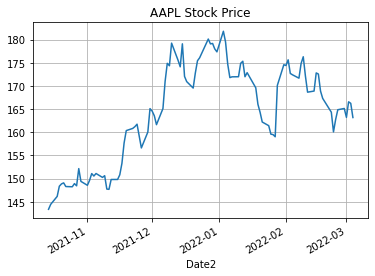

In [41]:
data[0]["Adj Close**"].plot(title = "AAPL Stock Price",grid = True)

# CSVファイルに出力する

In [42]:
data[0].to_csv("AAPL_Stock.csv")